In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, re

# Almost everything from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, mean_squared_error, accuracy_score, roc_auc_score, average_precision_score, recall_score, roc_curve
from sklearn.linear_model import SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# NLTK package
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# Optional
toggle_warn = True

def warn(*args, **kwargs):
    pass
import warnings

if not toggle_warn:
    warnings.warn = warn

In [3]:
train_data = pd.read_csv("https://raw.githubusercontent.com/RussellDash332/CS3244-Twemoji/main/Datasets/train_text_emoji_clean.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/RussellDash332/CS3244-Twemoji/main/Datasets/test_text_emoji_clean.csv")
valid_data = pd.read_csv("https://raw.githubusercontent.com/RussellDash332/CS3244-Twemoji/main/Datasets/valid_text_emoji_clean.csv")

In [4]:
train_data.head()

,annotations,tweets,labels
0,😂,school is so dead o my god,0
1,😂,lol I've been told mine is worse than yours bu...,0
2,😂,I'm excited to hear them..... That shit is goi...,0
3,😂,Damn alycia knows everything even indirect tweets,0
4,😂,That sound like everything,0


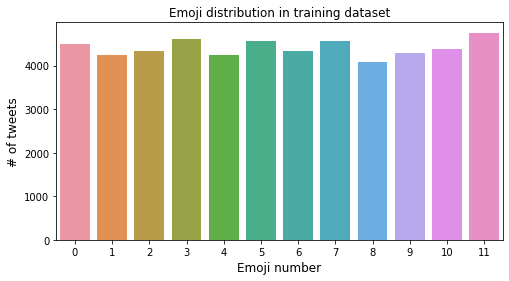

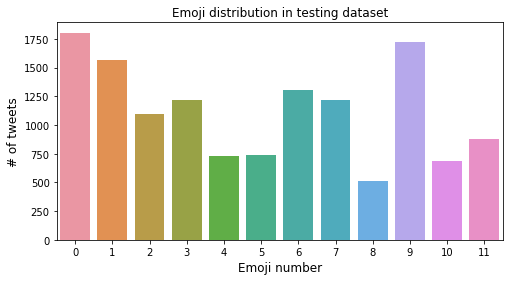

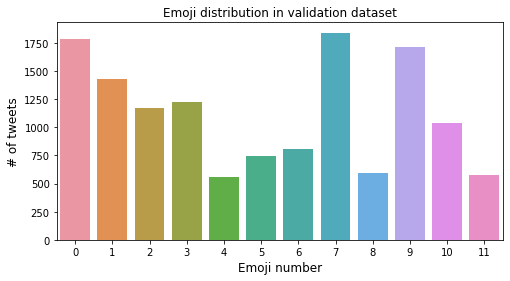

In [5]:
# https://fallfordata.com/multi-label-classification-of-texts-with-nltk/
for data, name in [(train_data, "training"), (test_data, "testing"), (valid_data, "validation")]:
    x = data.labels.value_counts()
    plt.figure(figsize=(8, 4))
    ax = sns.barplot(x=x.index, y=x.values)
    plt.title(f"Emoji distribution in {name} dataset")
    plt.xlabel('Emoji number', fontsize=12)
    plt.ylabel('# of tweets', fontsize=12)
    plt.show()

In [6]:
# https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1, 3), tokenizer=token.tokenize)
train_text_counts = cv.fit_transform(train_data.tweets)
valid_text_counts = cv.transform(valid_data.tweets) # do not fit, just transform

tf = TfidfVectorizer()
train_text_tf = tf.fit_transform(train_data.tweets)
valid_text_tf = tf.transform(valid_data.tweets) # do not fit, just transform

In [7]:
# What if we combine training and validation dataset and then split during the fitting process?
cv2 = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1, 3), tokenizer=token.tokenize)
tv_text_counts = cv2.fit_transform(train_data.tweets.append(valid_data.tweets))

tf2 = TfidfVectorizer()
tv_text_tf = tf2.fit_transform(train_data.tweets.append(valid_data.tweets))

In [8]:
def evaluate(y_val, predicted):
    print('Accuracy:', accuracy_score(y_val, predicted))
    print('F1 Score:', f1_score(y_val, predicted, average='weighted'))
    print('Confusion Matrix:')
    ax = sns.heatmap(confusion_matrix(y_val, predicted), annot=True, fmt="d")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

MultinomialNB Accuracy with CountVectorizer:
Accuracy: 0.23677768711519917
F1 Score: 0.23913863359271614
Confusion Matrix:


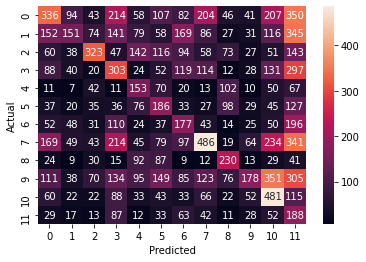

In [9]:
# CountVectorizer
X_train, X_test, y_train, y_test = train_text_counts, valid_text_counts, train_data.labels, valid_data.labels
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("MultinomialNB Accuracy with CountVectorizer:")
evaluate(y_test, predicted)

MultinomialNB Accuracy with CountVectorizer with split from t+v:
Accuracy: 0.260132590025614
F1 Score: 0.2571700739941756
Confusion Matrix:


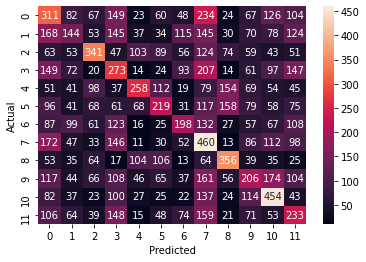

In [10]:
# CountVectorizer with split from t+v
X_train, X_test, y_train, y_test = train_test_split(tv_text_counts, pd.concat([train_data, valid_data]).labels, test_size = 0.2, random_state = 1)
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("MultinomialNB Accuracy with CountVectorizer with split from t+v:")
evaluate(y_test, predicted)

MultinomialNB Accuracy with TfidfVectorizer:
Accuracy: 0.24797863659965877
F1 Score: 0.24787959302640983
Confusion Matrix:


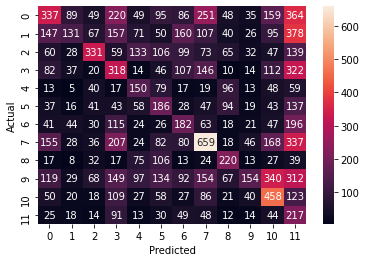

In [11]:
# TfidfVectorizer
X_train, X_test, y_train, y_test = train_text_tf, valid_text_tf, train_data.labels, valid_data.labels
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("MultinomialNB Accuracy with TfidfVectorizer:")
evaluate(y_test, predicted)

MultinomialNB Accuracy with TfidfVectorizer with split from t+v:
Accuracy: 0.2642760283260509
F1 Score: 0.2573297871547281
Confusion Matrix:


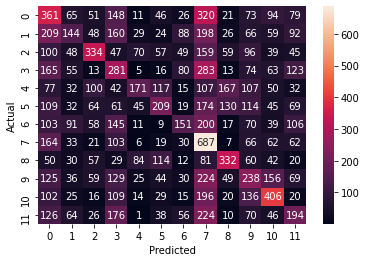

In [12]:
# TfidfVectorizer with split from t+v
X_train, X_test, y_train, y_test = train_test_split(tv_text_tf, pd.concat([train_data, valid_data]).labels, test_size = 0.2, random_state = 1)
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("MultinomialNB Accuracy with TfidfVectorizer with split from t+v:")
evaluate(y_test, predicted)

In [13]:
train_data.head()

,annotations,tweets,labels
0,😂,school is so dead o my god,0
1,😂,lol I've been told mine is worse than yours bu...,0
2,😂,I'm excited to hear them..... That shit is goi...,0
3,😂,Damn alycia knows everything even indirect tweets,0
4,😂,That sound like everything,0


In [14]:
valid_data.head()

,annotations,tweets,labels
0,😂,hahahah you guys crack me up,0
1,😂,I'm dead,0
2,😂,ate girl! The tweet was before TMC pa,0
3,😂,Also who would've thought that Will Griggs on ...,0
4,😂,I'm not fooling w. you tonight,0


In [15]:
train_data_nltk = train_data.copy()
train_data_nltk.tweets = train_data.tweets.apply(lambda x: " ".join(list(filter(lambda w: w not in set(stopwords.words("english")), word_tokenize(x)))))
valid_data_nltk = valid_data.copy()
valid_data_nltk.tweets = valid_data.tweets.apply(lambda x: x)

"""
tf = TfidfVectorizer(lowercase=True, ngram_range=(1, 5), tokenizer=token.tokenize, norm="l2")
train_text_tf = tf.fit_transform(train_data_nltk.tweets)
valid_text_tf = tf.transform(valid_data_nltk.tweets) # do not fit, just transform

X_train, X_test, y_train, y_test = train_text_tf, valid_text_tf, train_data.labels, valid_data.labels
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
evaluate(y_test, predicted)
"""

'\ntf = TfidfVectorizer(lowercase=True, ngram_range=(1, 5), tokenizer=token.tokenize, norm="l2")\ntrain_text_tf = tf.fit_transform(train_data_nltk.tweets)\nvalid_text_tf = tf.transform(valid_data_nltk.tweets) # do not fit, just transform\n\nX_train, X_test, y_train, y_test = train_text_tf, valid_text_tf, train_data.labels, valid_data.labels\nclf = MultinomialNB().fit(X_train, y_train)\npredicted = clf.predict(X_test)\nevaluate(y_test, predicted)\n'

In [16]:
train_data_nltk.head()

,annotations,tweets,labels
0,😂,school dead god,0
1,😂,lol I 've told mine worse I n't believe,0
2,😂,I 'm excited hear ..... That shit going rattle...,0
3,😂,Damn alycia knows everything even indirect tweets,0
4,😂,That sound like everything,0


In [17]:
train_data.head()

,annotations,tweets,labels
0,😂,school is so dead o my god,0
1,😂,lol I've been told mine is worse than yours bu...,0
2,😂,I'm excited to hear them..... That shit is goi...,0
3,😂,Damn alycia knows everything even indirect tweets,0
4,😂,That sound like everything,0
